<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv('Dados/HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.head(10)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0
6,52025,211,2,3,2,1,0
7,37550,172,2,2,3,1,0
8,31500,62,1,4,2,0,0
9,37650,218,3,1,0,1,0


## Verificando o tamanho do dataset

In [4]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [6]:
dados.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

## Configure o estilo e cor dos gráficos (opcional)

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, 'Valores')

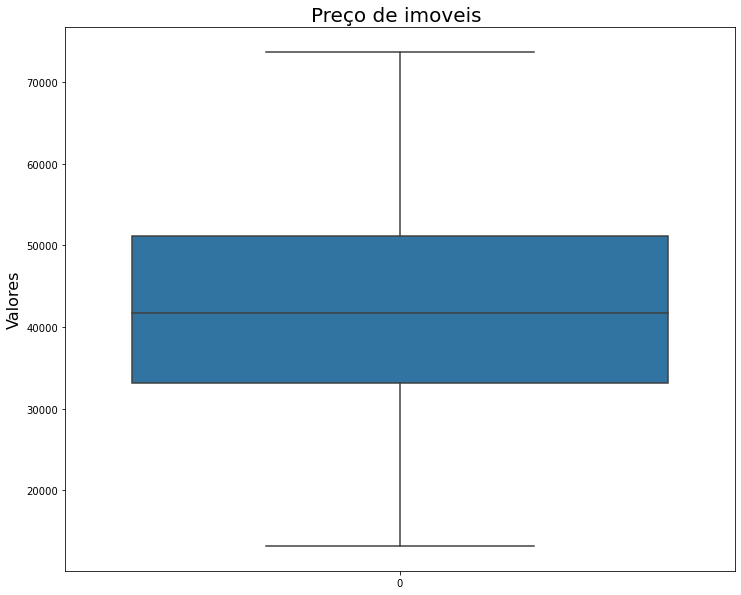

In [7]:
ax = sns.boxplot(data = dados['precos'])
ax.figure.set_size_inches(12,10)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

Text(0, 0.5, 'Valores')

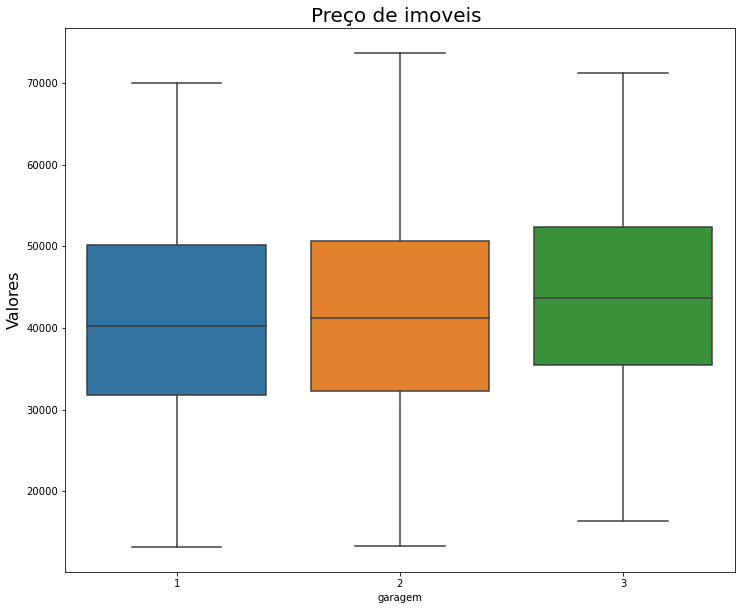

In [8]:
ax = sns.boxplot(data = dados, x = 'garagem', y= 'precos')
ax.figure.set_size_inches(12,10)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

### Box-plot (Preço X Banheiros)

Text(0, 0.5, 'Valores')

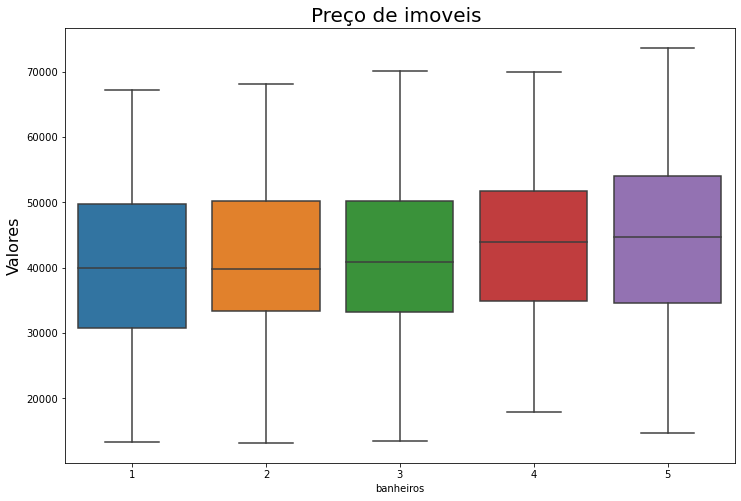

In [9]:
ax = sns.boxplot(data = dados, x = 'banheiros', y= 'precos')
ax.figure.set_size_inches(12,8)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

### Box-plot (Preço X Lareira)

Text(0, 0.5, 'Valores')

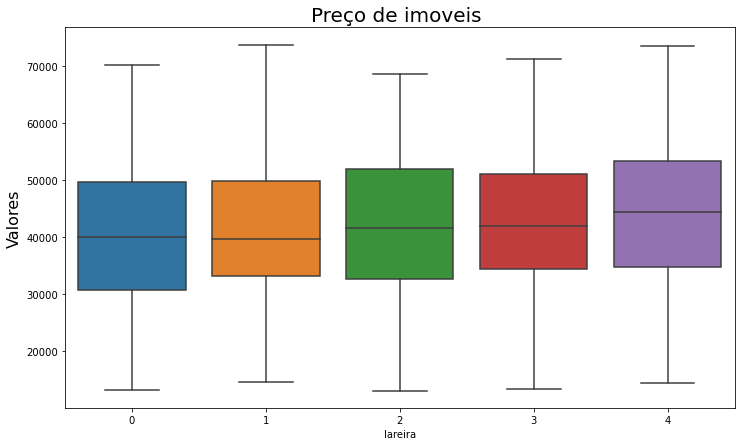

In [10]:
ax = sns.boxplot(data = dados, x = 'lareira', y= 'precos')
ax.figure.set_size_inches(12,7)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

### Box-plot (Preço X Acabamento em Mármore)

Text(0, 0.5, 'Valores')

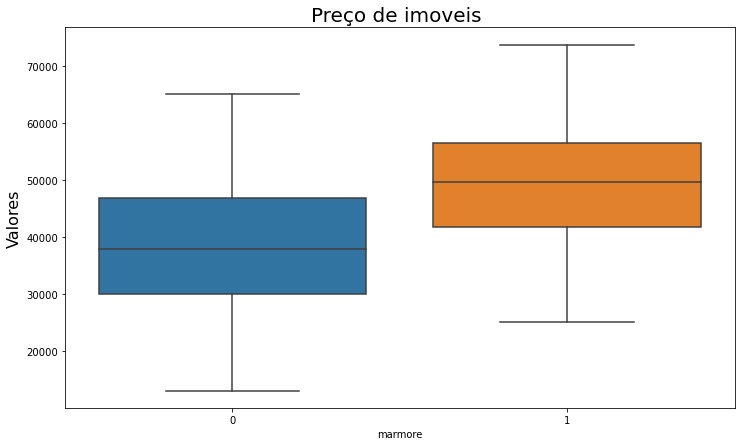

In [11]:
ax = sns.boxplot(data = dados, x = 'marmore', y= 'precos')
ax.figure.set_size_inches(12,7)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

### Box-plot (Preço X Andares)

Text(0, 0.5, 'Valores')

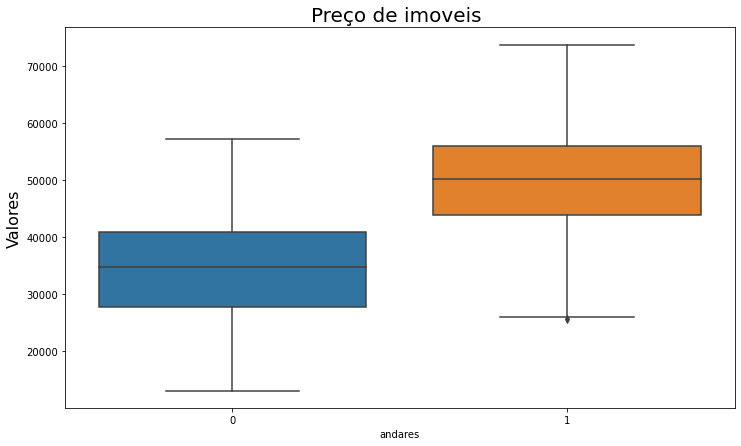

In [12]:
ax = sns.boxplot(data = dados, x = 'andares', y= 'precos')
ax.figure.set_size_inches(12,7)
ax.set_title('Preço de imoveis ', fontsize = 20)
ax.set_ylabel('Valores', fontsize=16)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\enzow\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distrubuição de Frequências'}, xlabel='precos', ylabel='Density'>

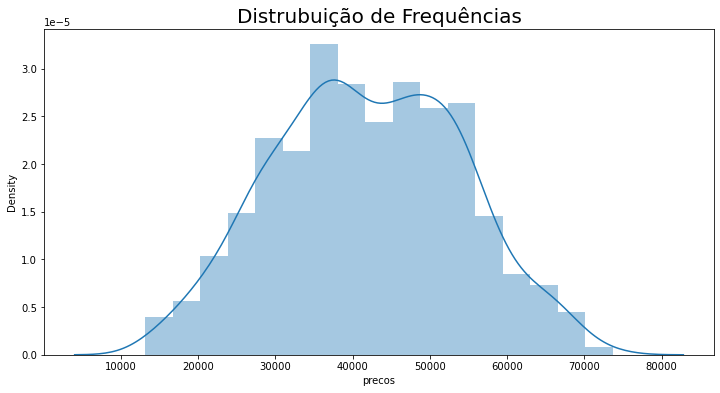

In [13]:
ax = sns.distplot(dados['precos'])
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.figure.set_size_inches(12, 6)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

AttributeError: 'PairGrid' object has no attribute 'set_title'

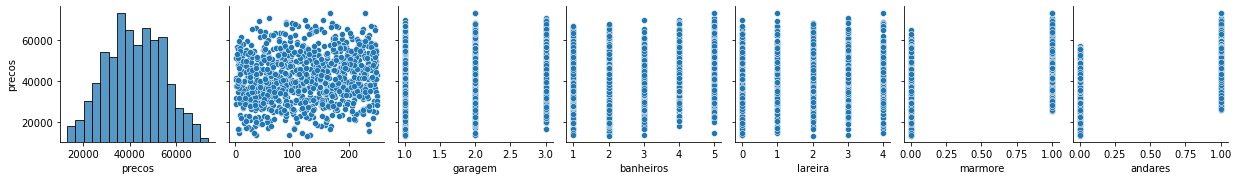

In [14]:
ax = sns.pairplot(data = dados, y_vars= 'precos')
ax.set_title('Pai plot', fontsize=20)
ax.figure.set_size_inches(12, 6)

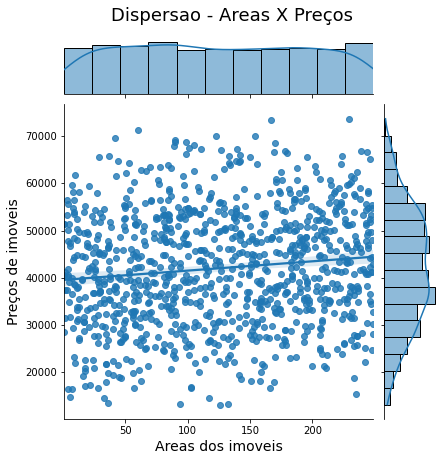

In [31]:
ax = sns.jointplot(x="area", y="precos", data=dados, kind= 'reg')
ax.fig.suptitle('Dispersao - Areas X Preços', fontsize=18, y=1.05)
ax.set_axis_labels("Areas dos imoveis", "Preços de imoveis", fontsize=14)
ax

In [ ]:
ax = sns.pairplot(data = dados, y_vars= 'precos', x_vars= ['andares', 'marmore'])
ax.set_title('Pai plot', fontsize=20)
ax.figure.set_size_inches(12, 6)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [15]:
y = dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [60]:
X = dados[['area','marmore', 'andares', 'banheiros', 'lareira']] 

## Criando os datasets de treino e de teste

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando a classe *LinearRegression()*

In [18]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [62]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [63]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.62


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [64]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [65]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2)) 

R² = 0.66


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [72]:
area = 150
marmore = 0
andares = 0
banheiros = 3
lareira = 0
entrada = [[area , marmore, andares, banheiros, lareira ]]

print('R$ {0:.2f} '.format(modelo.predict(entrada)[0]))

R$ 30409.07 


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

## Salvando o modelo estimado

In [69]:
output = open('modelo_casas', 'wb' )
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

In [79]:
modelo = open('modelo_casas','rb')
lm_new = pickle.load(modelo)
modelo.close()


In [80]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
area = widgets.Text(description="Área")
banheiros = widgets.Text(description="Banheiros")
lareira = widgets.Text(description="Lareira")
marmore = widgets.Text(description="Mármore?")
andares = widgets.Text(description="Andares?")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([area, banheiros, marmore])
right = VBox([ lareira, andares])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(area.value if area.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(lareira.value if lareira.value else 0), 
                float(marmore.value if marmore.value else 0), 
                float(andares.value if andares.value else 0)
             ]]
    print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [81]:
display(inputs,botao)

Button(description='Simular', style=ButtonStyle())